In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("train.csv")    

Creating a new dataframe and selecting 'sex','age','pclass' and 'fare' features

In [3]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['fare'] = df['Fare']
X['survived'] = df['Survived']

In [4]:
X = X.dropna(axis=0)

In [5]:
y = X['survived']
X = X.drop(['survived'], axis=1)

In [6]:
pd.get_dummies(X.sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [7]:
X['sex'] = pd.get_dummies(X.sex)['female']

In [8]:
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X = X.drop(['pclass_3', 'pclass'], axis=1)

In [9]:
X

,sex,age,fare,pclass_1,pclass_2
0,0,22,7.2500,0,0
1,1,38,71.2833,1,0
2,1,26,7.9250,0,0
3,1,35,53.1000,1,0
4,0,35,8.0500,0,0
6,0,54,51.8625,1,0
7,0,2,21.0750,0,0
8,1,27,11.1333,0,0
9,1,14,30.0708,0,1
10,1,4,16.7000,0,0


In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [13]:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print "Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate)

Base rate accuracy is 0.55


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [16]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.85


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [19]:
print "---Base Model---"
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print "Base Rate AUC = %2.2f" % base_roc_auc
print classification_report(y_test,base_rate_model(X_test) )
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.55      1.00      0.71        79
          1       0.00      0.00      0.00        64

avg / total       0.31      0.55      0.39       143



---Logistic Model---
Logistic AUC = 0.85
             precision    recall  f1-score   support

          0       0.87      0.85      0.86        79
          1       0.82      0.84      0.83        64

avg / total       0.85      0.85      0.85       143



In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

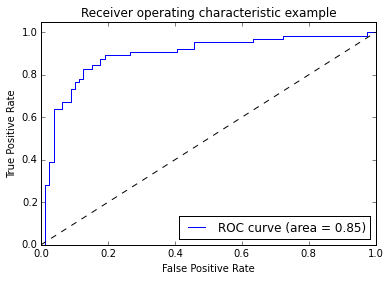

In [21]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()